In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_theme(context="notebook",style="darkgrid")
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,classification_report


In [2]:
df=pd.read_csv("data\IRIS.csv")

<>:1: SyntaxWarning: invalid escape sequence '\I'
<>:1: SyntaxWarning: invalid escape sequence '\I'
C:\Users\issha\AppData\Local\Temp\ipykernel_15176\1517618526.py:1: SyntaxWarning: invalid escape sequence '\I'
  df=pd.read_csv("data\IRIS.csv")


In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


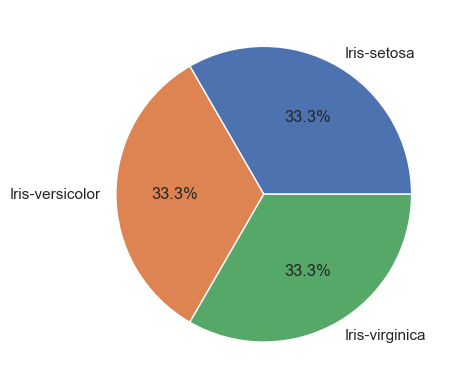

In [5]:
plt.pie(df["species"].value_counts(),autopct="%1.1f%%",labels=df["species"].value_counts().index)
plt.show();



In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


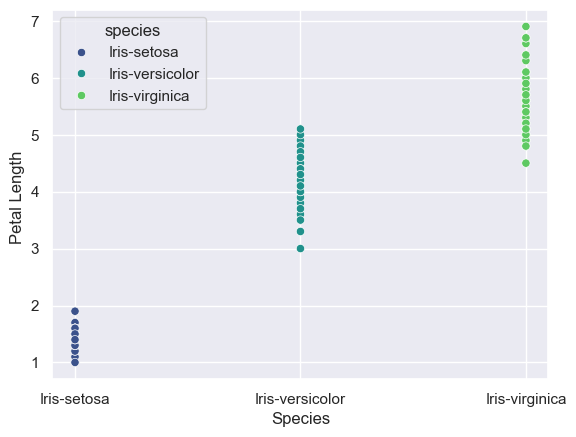

In [7]:
"""This Function Helps to Plot each featrues of Flower with its species

    Args:
        feature (str): featrue of flower
    return:
        plot
    """

def plot_features(feature):
    sns.scatterplot(data=df,x="species",y=feature,hue="species",palette="viridis")


    plt.xlabel("Species")
    plt.ylabel("Petal Length ")
    plt.show();
plot_features("petal_length")

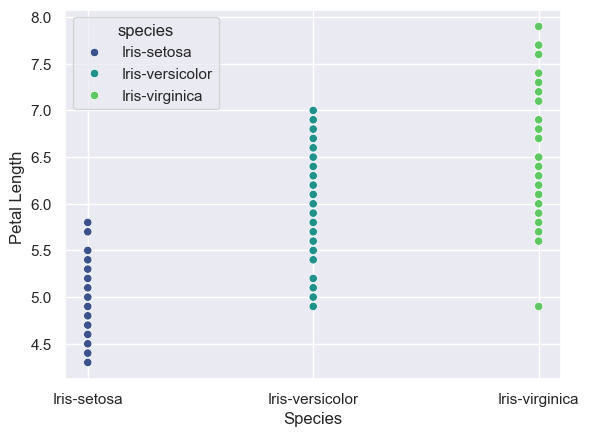

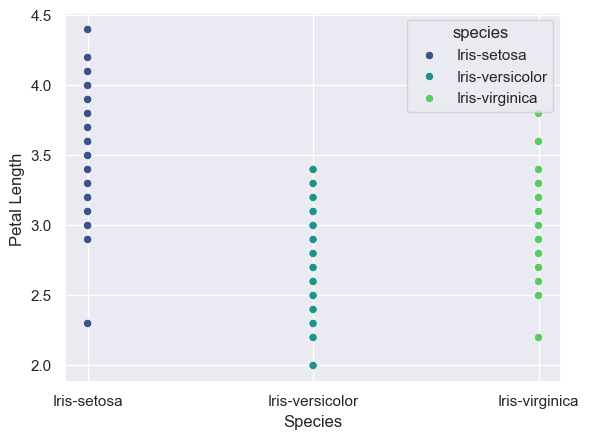

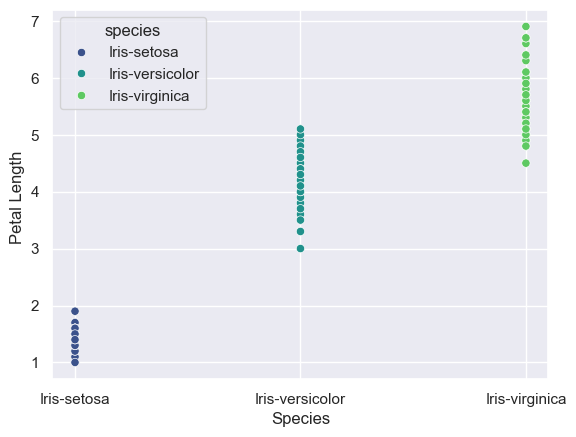

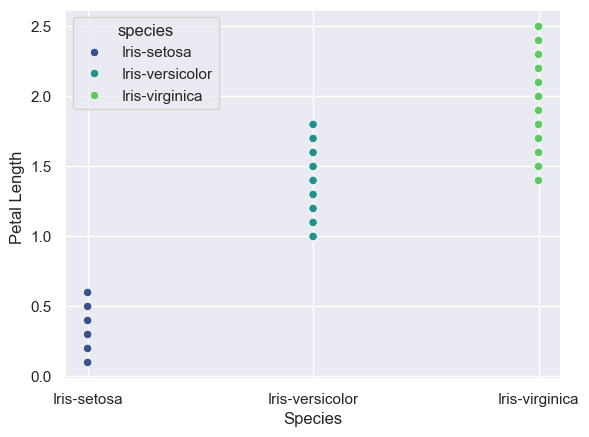

In [8]:
cols=list(df.columns)

for col in cols:
    if col=="species":
        break
    plot_features(feature=col)

In [9]:
def box_plot(feature: str) -> None:
    """This helps plot Box Plot

    Args:
        feature (str): Char of Target
    """
    plt.figure(figsize=(5, 5))
    sns.boxplot(x="species", y=feature, data=df, palette="viridis", hue="species")
    plt.title(f'Box Plot of {feature}')
    plt.show()

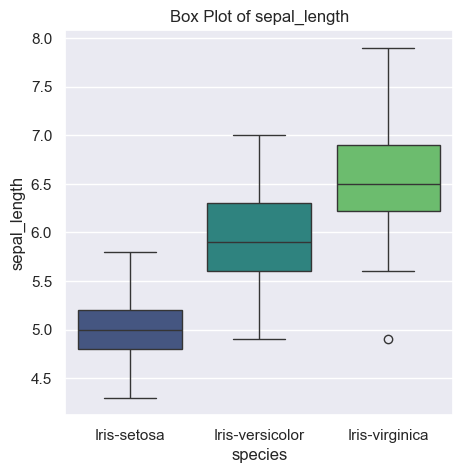

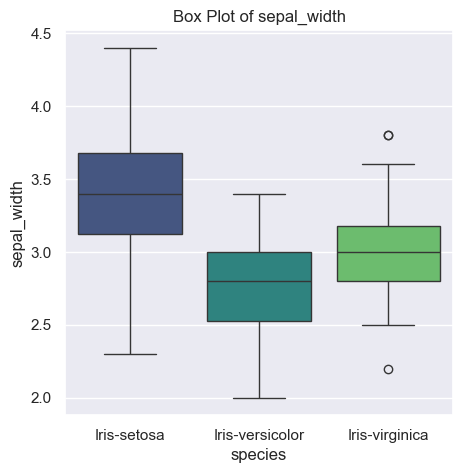

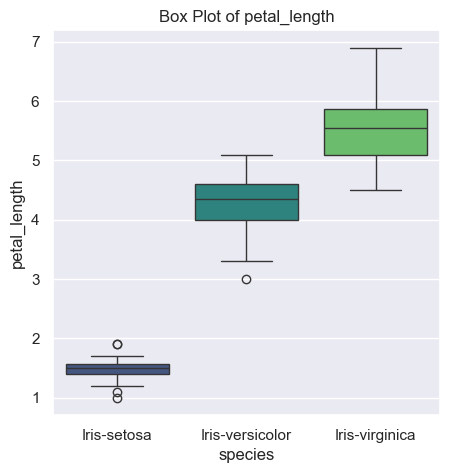

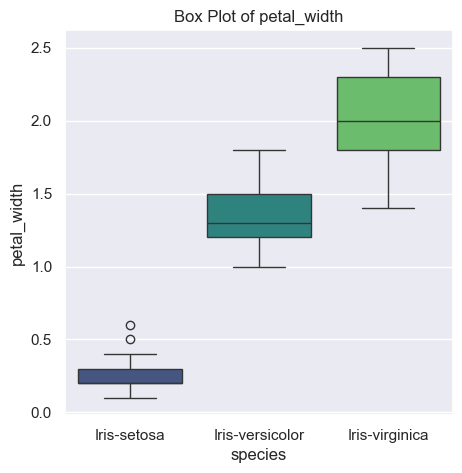

In [10]:
for col in cols:
    if col=="species":
        break
    box_plot(feature=col)

In [11]:
def IQR_Normalisation(feature):
    """This Functions takes in feature of data and does IQR Normalization on it

    Args:
        feature (str): Feature of Target
    Return:
        None
    """
    Q1=df[feature].quantile(0.25)
    Q3=df[feature].quantile(0.75)
    IQR=Q3-Q1
    df[feature]=df[feature] -   Q1/IQR


In [12]:
for col in cols:
    if col=="species":
        break
    IQR_Normalisation(feature=col)
df.head()



,sepal_length,sepal_width,petal_length,petal_width,species
0,1.176923,-2.1,0.942857,2.775558e-17,Iris-setosa
1,0.976923,-2.6,0.942857,2.775558e-17,Iris-setosa
2,0.776923,-2.4,0.842857,2.775558e-17,Iris-setosa
3,0.676923,-2.5,1.042857,2.775558e-17,Iris-setosa
4,1.076923,-2.0,0.942857,2.775558e-17,Iris-setosa


In [13]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,1.920256,-2.546000,3.301524,0.998667
std,0.828066,0.433594,1.764420,0.763161
min,0.376923,-3.600000,0.542857,-0.100000
25%,1.176923,-2.800000,1.142857,0.100000
50%,1.876923,-2.600000,3.892857,1.100000
75%,2.476923,-2.300000,4.642857,1.600000
max,3.976923,-1.200000,6.442857,2.300000


In [14]:
"""def remove_outliers(feature):
    Q1=df[feature].quantile(0.25)
    Q3=df[feature].quantile(0.75)
    IQR=Q3-Q1
    lr=Q1 - 1.5* IQR
    hr=Q3 + 1.5* IQR
    df[feature]=[[(df[feature]>= lr  & df[feature] <= hr )]]
    return df
    """

'def remove_outliers(feature):\n    Q1=df[feature].quantile(0.25)\n    Q3=df[feature].quantile(0.75)\n    IQR=Q3-Q1\n    lr=Q1 - 1.5* IQR\n    hr=Q3 + 1.5* IQR\n    df[feature]=[[(df[feature]>= lr  & df[feature] <= hr )]]\n    return df\n    '

In [15]:
df["species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [16]:
df["species"] = df["species"].map({"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2})

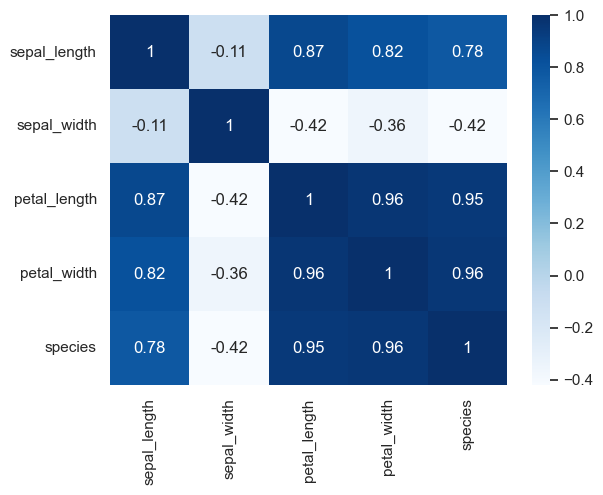

In [17]:
corrMatrix=df.corr()
corrMatrix
sns.heatmap(corrMatrix,annot=True,cmap="Blues");

In [21]:
df["species"] = df["species"].map({0:"Iris-setosa", 1:"Iris-versicolor", 2:"Iris-virginica"})

In [22]:
X=df.drop("species",axis=1)
y=df["species"]
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=7)


In [23]:
y_train.value_counts()

species
Iris-virginica     38
Iris-setosa        37
Iris-versicolor    37
Name: count, dtype: int64

In [24]:
y_test.value_counts()

species
Iris-setosa        13
Iris-versicolor    13
Iris-virginica     12
Name: count, dtype: int64

In [25]:
clf=RandomForestClassifier()
clf.fit(X_train,y_train)


RandomForestClassifier()

In [26]:
y_pred=clf.predict(X_test)
print( classification_report(y_test,y_pred))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.92      1.00      0.96        12

       accuracy                           0.97        38
      macro avg       0.97      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



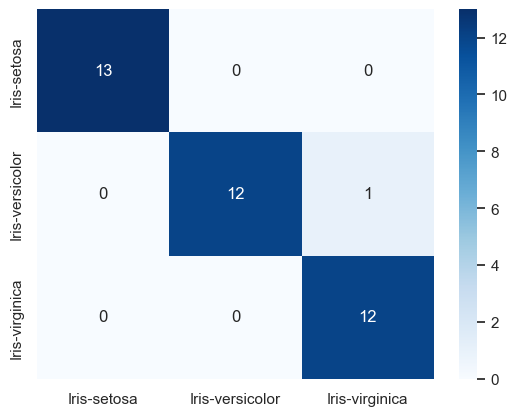

In [27]:
label= [i for i in np.unique(df["species"])]
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap="Blues",xticklabels=label,yticklabels=label);
